In [1]:
from n_grams import get_grams
from features import store_features
from scipy.sparse import hstack
import pandas as pd
from sklearn.model_selection import train_test_split
from cleaning import cleaning

# Preprocessing of data and getting the N-grams

In [2]:
X_train, Y_train = cleaning()     
grams = get_grams()

# Generating features and storing them

In [6]:
store_features()

In [3]:
###Extracting features from the file ###

def getfeatures():
    df = pd.read_csv('features.csv', delimiter=',')
    list_of_rows = [list(row) for row in df.values]
    return list_of_rows

features = getfeatures()


In [4]:
### Combining pragmatic, linguistic features set with n-grams set (lexical features) ###

combined_feat_unigram = hstack([grams[0], features])
combined_feat_bigram = hstack([grams[1], features])
combined_feat_trigram = hstack([grams[2], features])
combined_feat_12gram = hstack([grams[3], features])
combined_feat_13gram = hstack([grams[4], features])

In [5]:
### Splitting the dataset into test and train set  ###

features_train_uni, features_test_uni, labels_train_uni, labels_test_uni = train_test_split(combined_feat_unigram, Y_train, test_size = .10, random_state = 0)
features_train_bi, features_test_bi, labels_train_bi, labels_test_bi = train_test_split(combined_feat_bigram, Y_train, test_size = .10, random_state = 0)
features_train_tri, features_test_tri, labels_train_tri, labels_test_tri = train_test_split(combined_feat_trigram, Y_train, test_size = .10, random_state = 0)
features_train_12, features_test_12, labels_train_12, labels_test_12 = train_test_split(combined_feat_12gram, Y_train, test_size = .10, random_state = 0)
features_train_13, features_test_13, labels_train_13, labels_test_13 = train_test_split(combined_feat_13gram, Y_train, test_size = .10, random_state = 0)

In [6]:
features_train, features_test, labels_train, labels_test = features_train_12, features_test_12, labels_train_12, labels_test_12 

In [9]:
### Logistic Regression (Currently using Unigrams + Bigrams for lexical features) ###


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model= LogisticRegression(max_iter = 10000, C=0.5)
model.fit(features_train, labels_train)
score =  model.score(features_test, labels_test)
print("Test score for Logistic Regression:", score)     #test set score
labels_predicted = model.predict(features_test)
f1 = f1_score(labels_test, labels_predicted, pos_label='1')
print("F1 score for Logistic Regression:", f1)

Test score for Logistic Regression: 0.7873303167420814
F1 score for Logistic Regression: 0.763819095477387


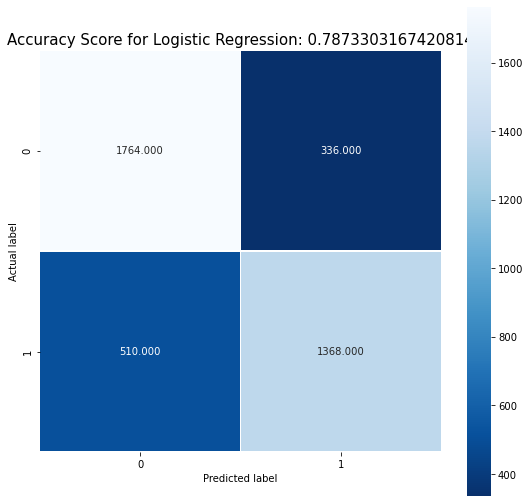

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(labels_test, labels_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [10]:
### LinearSVC (Currently using Unigrams + Bigrams for lexical features) ###


from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

svm = LinearSVC(C=0.07, max_iter = 100000)
svm.fit(features_train, labels_train)
score = svm.score(features_test, labels_test)
print("Test score for Linearsvm:", score)     #test set score
labels_predicted = svm.predict(features_test)
f1 = f1_score(labels_test, labels_predicted, pos_label='1')
print("F1 score for Linearsvm:", f1)

Test score for Linearsvm: 0.7936148818501759
F1 score for Linearsvm: 0.7728907330567081


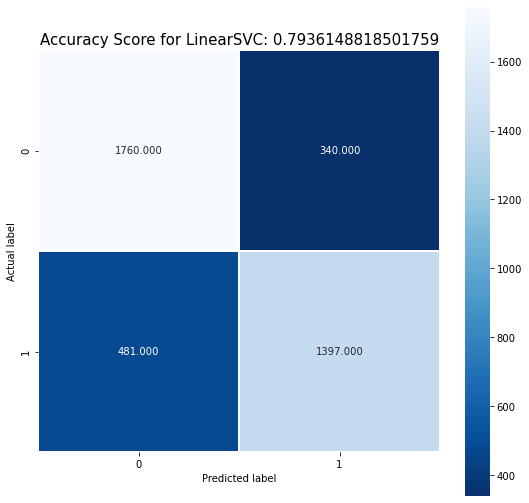

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(labels_test, labels_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for LinearSVC: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [7]:
### RandomForests classifier (Currently using Unigrams + Bigrams for lexical features) ###



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score


rfc = RandomForestClassifier(n_estimators = 100, random_state=0, min_samples_split=8, max_depth=50)
rfc.fit(features_train, labels_train)
print("Training score for RandomForest:", rfc.score(features_train_12, labels_train_12)) 
print("Test score for RandomForest:",rfc.score(features_test, labels_test))
labels_predicted = rfc.predict(features_test)
f1 = f1_score(labels_test, labels_predicted, pos_label='1')
print("F1 score for RandomForest:", f1)

Training score for RandomForest: 0.8242276967767164
Test score for RandomForest: 0.717948717948718
F1 score for RandomForest: 0.6292134831460674


In [8]:
### DecsionTress classifier (Currently using Unigrams + Bigrams for lexical features) ###


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dtc1 = DecisionTreeClassifier(max_depth = 10)
dtc1 = dtc1.fit(features_train, labels_train)

print("Training score for DecisionTree:", dtc1.score(features_train_12, labels_train_12))
print("Test score for DecisionTree:", dtc1.score(features_test, labels_test))
labels_predicted = dtc1.predict(features_test)
f1 = f1_score(labels_test, labels_predicted, pos_label='1')
print("F1 score for DecisionTree:", f1)

Training score for DecisionTree: 0.6245740461426736
Test score for DecisionTree: 0.6148818501759679
F1 score for DecisionTree: 0.6299516908212559


In [38]:
### Gaussian Naive Bayes (Currently using Unigrams + Bigrams for lexical features) ###


from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import f1_score
import numpy as np

gnb = GaussianNB()
gnb.fit(features_train.toarray(), labels_train)
predicted_test = gnb.predict(features_test.toarray())
print("Test score for Gaussian Naive Bayes:", metrics.accuracy_score(predicted_test,labels_test))

f1 = f1_score(labels_test, predicted_test, pos_label='1')
print("F1 score for Gaussian Naive Bayes:", f1)

Test score for Gaussian Naive Bayes: 0.6671694318753142
F1 score for Gaussian Naive Bayes: 0.6523109243697478
